# Linear Regression

**Using Linear Regression to predict the precentage of marks that a student is expected to score based upon the no.of hours they studied.**

In [1]:
# Importing necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Importing the dataset

url = "http://bit.ly/w-data"
df = pd.read_csv(url)


In [3]:
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
# To find the no.of rows and columns
print(df.shape)
print()

# To print datatypes 
print(df.dtypes)
print()

# To print the summary
print(df.describe())

(25, 2)

Hours     float64
Scores      int64
dtype: object

           Hours     Scores
count  25.000000  25.000000
mean    5.012000  51.480000
std     2.525094  25.286887
min     1.100000  17.000000
25%     2.700000  30.000000
50%     4.800000  47.000000
75%     7.400000  75.000000
max     9.200000  95.000000


### Data Preprocessing

In [5]:
# To find missing values

df.isnull().sum()

Hours     0
Scores    0
dtype: int64

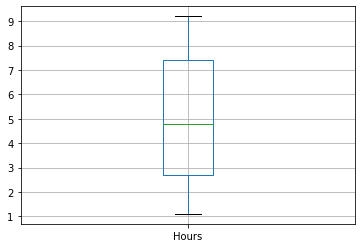

In [6]:
# Finding outliers

df.boxplot(column="Hours")

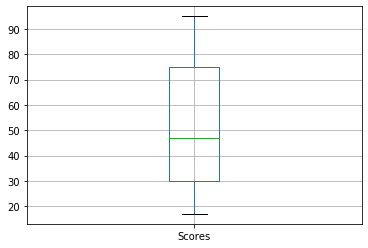

In [7]:
df.boxplot(column="Scores")

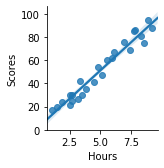

In [8]:
# To check linearity

sns.pairplot(df,x_vars=["Hours"],y_vars=["Scores"],kind="reg")

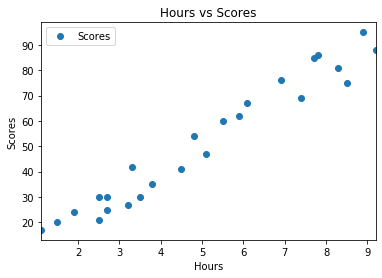

In [9]:
df.plot(x="Hours",y="Scores",style='o')
plt.title("Hours vs Scores")
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

### Preparing the data


In [11]:
X=df.values[:,:-1]
Y=df.values[:,-1]

### Splitting the data


In [12]:
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

### Model Building

In [13]:
from sklearn.linear_model import LinearRegression

# create the model
lm = LinearRegression()

# Fit the model
lm.fit(X_train,Y_train)

# Print intercept and coefficients

print(lm.intercept_)
print(lm.coef_)

2.0181600414346974
[9.91065648]


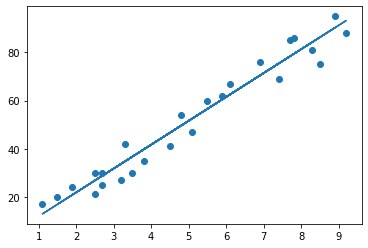

In [14]:
# Plotting the regression line
line = lm.coef_*X+lm.intercept_

# Plotting for the test data
plt.scatter(X, Y)
plt.plot(X, line);
plt.show()

### Predicting Values


In [15]:
Y_pred=lm.predict(X_test)
print(Y_pred)


[16.88414476 33.73226078 75.357018   26.79480124 60.49103328]


In [16]:
# Creating a new dataframe and storing the Actual and Predicted values
new_df = pd.DataFrame()

new_df['Actual values']=Y_test
new_df['Predicted values']=Y_pred

new_df

,Actual values,Predicted values
0,20.0,16.884145
1,27.0,33.732261
2,69.0,75.357018
3,30.0,26.794801
4,62.0,60.491033


In [17]:
# Predicting the Score for 9.25 Hours

own_pred = lm.predict([[9.25]])
print("No of Hours = {}".format([[9.25]]))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = 93.69173248737535
